In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
 data = np.loadtxt("fake_classification.txt")

In [3]:
train = data[0:int(0.75*len(data)) ]
test = data[int(0.75*len(data)):]


In [16]:
def clasificar(data,point,k):
    dists = []
    for i in data:
        distancia = (i[0]-point[0])**2.0+(i[1]-point[1])**2.0
        
        dists.append([i,distancia])
    a = np.array(dists)
    mins= []
    for i in range(k):
        ind = (where(a[:,1]==min(a[:,1]))[0][0])

        mins.append(a[ind][0][2])
        a = np.delete(a,ind,0)
    mins = np.array(mins)
    unos = 0
    for i in mins:
        if i==1.0:
            unos +=1
    ceros = k-unos
    if(unos>ceros):
        return 1.0
    elif(unos<ceros):
        return 0.0
    else:
        rand = random.random()
        if(rand<0.5):
            return 0
        else:
            return 1

In [17]:
test_in = test[:,0:2]
test_out =  test[:,2]

In [18]:
def percent(k):
    outs=[]
    for i in test_in:
        outs.append(clasificar(train,i,k))
    tot = len(test)
    acert=0
    for i in range(len(test)):
        if(outs[i]==test_out[i]):
            acert +=1
    acert = float(acert)
    return (acert*100.0/tot)

In [29]:
def graficar(k):
    ys= []
    xs=[]
    for i in range(1,k):
        xs.append(i)
        ys.append(percent(i))
    plt.scatter(xs,ys,)
    print("El mayor porcentaje de acierto es: " +str(max(ys))+"%")

El mayor porcentaje de acierto es: 96.5%


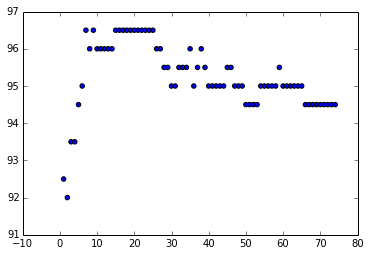

In [30]:
graficar(75)